In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math, copy

In [273]:
df = pd.read_csv('C:\\Users\\josam\\Downloads\\archive (1)\\data.csv')

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [275]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [276]:
df.head(100)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,86208,M,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,...,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368,NaN
96,86211,B,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,...,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376,NaN
97,862261,B,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,...,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988,NaN
98,862485,B,11.600,12.84,74.34,412.6,0.08983,0.07525,0.041960,0.033500,...,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756,NaN


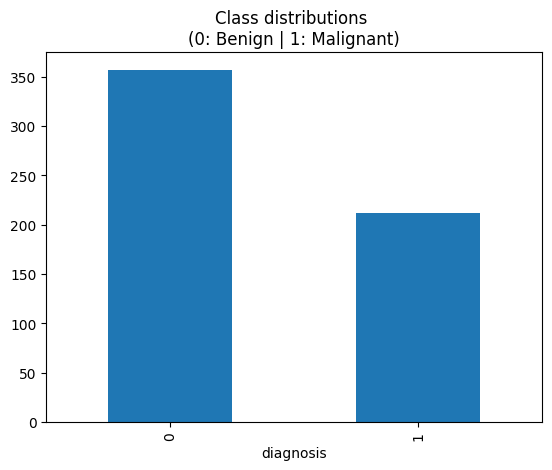

In [389]:
plot = df['diagnosis'].value_counts().plot(kind='bar', title="Class distributions \n(0: Benign | 1: Malignant)")
fig = plot.get_figure()

In [277]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df = df.drop(columns=['Unnamed: 32'], axis=1)

# Features and target
x_train = df.iloc[:, 2:].values  
y_train = df.iloc[:, 1].values   


In [278]:
print(x_train.shape)
print(y_train.shape)

(569, 30)
(569,)


In [279]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [359]:
# Cost function
def cost_func(x, w, b, y):
    m = x.shape[0]
    cost = 0
    epsilon = 1e-10  # A small value to avoid log(0)
    
    for i in range(m):
        z = np.dot(x[i], w) + b
        f_wb = sigmoid(z)
        
        # Ensure f_wb is not exactly 0 or 1 for numerical stability
        f_wb = np.clip(f_wb, epsilon, 1 - epsilon)
        
        cost += (-y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb))
        
    cost = cost / m   
    
    return cost


In [360]:

# Gradient function
def gradient(x, y, w, b):
    m = x.shape[0]
    n = x.shape[1]
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    for i in range(m):
        z = np.dot(x[i], w) + b
        f_wb = sigmoid(z)
        err = f_wb - y[i]
        
        # Update gradients
        for j in range(n):
            dj_dw[j] += err * x[i, j]
        dj_db += err
    
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [361]:

# Gradient descent
def gradient_descent(x, y, w, b, alpha, iterations):
    J_hist_2 = []
    p_hist_2 = []
    
    for i in range(iterations):
        dj_dw, dj_db = gradient(x, y, w, b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        J_hist_2.append(cost_func(x, w, b, y))
        p_hist_2.append([w, b])

        if i % math.ceil(iterations / 10) == 0:
            print(f"Iteration {i:4}: Cost {J_hist_2[-1]:0.2e} ",
                  f"d_dw: {dj_dw[-1]: 0.3e}, d_db: {dj_db: 0.3e}  ",
                  f"w: {w[-1]: 0.3e}, b: {b: 0.5e}")
    return w, b, J_hist_2, p_hist_2

In [383]:

# Initialize parameters
w_init = np.zeros(x_train.shape[1])  
b_init = 0
iterations = 10000
tmp_alpha = 1.0e-2

# Run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha,iterations)

print(f"(w,b) found by gradient descent: ({w_final}, {b_final})")


Iteration    0: Cost 1.44e+01  d_dw:  7.870e-03, d_db:  1.274e-01   w: -7.870e-05, b: -1.27417e-03


C:\Users\josam\AppData\Local\Temp\ipykernel_20720\3196251242.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Iteration 1000: Cost 1.90e+00  d_dw:  2.522e-03, d_db:  4.216e-02   w: -2.104e-02, b: -3.99428e-01
Iteration 2000: Cost 5.71e+00  d_dw:  3.423e-02, d_db:  4.410e-01   w: -1.556e-02, b: -4.88196e-01
Iteration 3000: Cost 1.79e+00  d_dw:  7.555e-04, d_db:  2.330e-02   w: -5.094e-03, b: -5.08831e-01
Iteration 4000: Cost 1.78e+00  d_dw:  1.209e-03, d_db:  2.916e-02   w:  2.688e-03, b: -5.69130e-01
Iteration 5000: Cost 1.86e+00  d_dw: -4.354e-04, d_db:  7.036e-03   w:  1.172e-02, b: -6.43650e-01
Iteration 6000: Cost 2.31e+00  d_dw:  7.203e-03, d_db:  1.019e-01   w:  2.455e-02, b: -6.56956e-01
Iteration 7000: Cost 2.87e+00  d_dw: -9.634e-03, d_db: -9.490e-02   w:  3.390e-02, b: -7.10840e-01
Iteration 8000: Cost 2.83e+00  d_dw: -9.081e-03, d_db: -8.963e-02   w:  4.339e-02, b: -7.60760e-01
Iteration 9000: Cost 2.78e+00  d_dw: -8.923e-03, d_db: -8.792e-02   w:  5.308e-02, b: -8.04931e-01
(w,b) found by gradient descent: ([-6.57412585e+00  4.00608313e+00 -2.92266541e+01 -5.14871956e+00
  5.336795

In [384]:
def predict(x, w, b):
    m = x.shape[0]
    y_pred = np.zeros(m)
    
    for i in range(m):
        z = np.dot(x[i], w) + b
        f_wb = sigmoid(z)
        y_pred[i] = 1 if f_wb >= 0.5 else 0
    
    return y_pred

In [385]:
def compute_accuracy(y_pred, y_true):
    correct = np.sum(y_pred == y_true)
    accuracy = correct / y_true.shape[0] * 100
    return accuracy

In [386]:
def plot_predictions(y_pred, y_true):
    plt.figure(figsize=(10,6))
    plt.plot(y_true, 'bo', label='Actual', alpha=0.6)
    plt.plot(y_pred, 'ro', label='Predicted', alpha=0.6)
    plt.title('Actual vs Predicted Labels')
    plt.xlabel('Sample index')
    plt.ylabel('Diagnosis')
    plt.legend(loc='best')
    plt.show()

Training Accuracy: 92.44%


C:\Users\josam\AppData\Local\Temp\ipykernel_20720\3196251242.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


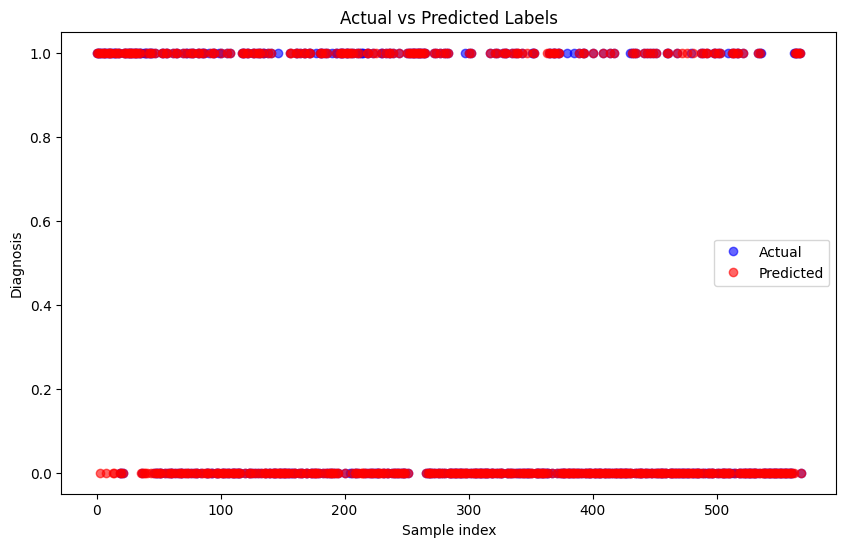

In [387]:
# Predict using the final parameters
y_pred_train = predict(x_train, w_final, b_final)

# Compute accuracy
accuracy_train = compute_accuracy(y_pred_train, y_train)
print(f"Training Accuracy: {accuracy_train:.2f}%")

# Plot predictions
plot_predictions(y_pred_train, y_train)